## SPARKS FOUNDATION

## TASK 2: Prediction using Unsupervised ML

## Done by Vignesh Arjun. G

In [3]:
## Importing the needed libraries 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [6]:
## Importing the data

In [7]:
inp= pd.read_csv("Iris.csv")

In [8]:
#3 Reading the data

In [9]:
inp.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
inp =inp.drop("Id",axis= 1)

In [11]:
## Checking for null values

In [12]:
inp.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
## Checking the value distribution of the dataset

In [14]:
inp.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
inp.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [16]:
## Clustering

In [17]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
hopkins(inp.drop("Species", axis=1))

0.8328224822809259

In [19]:
df1 = inp.drop ('Species', axis = 1)

In [20]:
#The hopkins score is high . This shows that the dataset is good for clustering

In [21]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

In [22]:
df1 = pd.DataFrame(df1)
df1.columns = inp.columns[0:4]

In [23]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [24]:
 # Silhouette Score
 

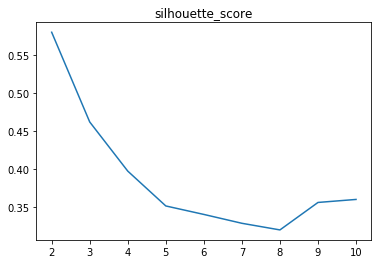

In [25]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
plt.title('silhouette_score')

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

In [26]:
# Elbow Curve

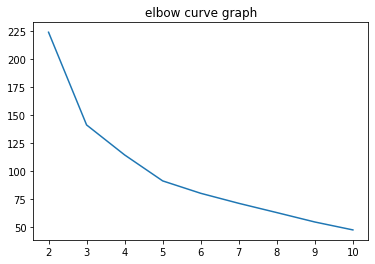

In [27]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
plt.title("elbow curve graph")    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

In [28]:
# From the above two methods, i have chosen 3 as the optimal number of clusters for this dataset.

In [29]:
#Fitting the model in the dataset

In [30]:
 K=3
kmean = KMeans(n_clusters = 3, random_state = 101)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [31]:
#Converting array to a dataframe

In [32]:
label = pd.DataFrame(kmean.labels_, columns = ['label'])

In [33]:
label

,label
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,1
147,2
148,2


In [34]:
inp.kmean = inp.copy()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [35]:
inp.kmean = pd.concat([inp.kmean, label ], axis =1)

In [36]:
inp.kmean.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [37]:
# Number of datapoints datapoints in each cluster
inp.kmean.label.value_counts()

1    53
0    50
2    47
Name: label, dtype: int64

In [38]:
# Plotting the clusters for profiling

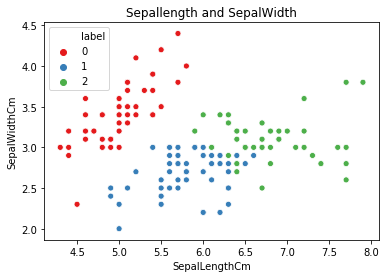

In [39]:
# Plot1
plt.title("Sepallength and SepalWidth")
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'label', data = inp.kmean, palette = 'Set1')

Cluster 0 has high sepal width and low sepal length .

Cluster 2 has High Sepal length and average sepal width.

Cluster 1 has low Sepal width and average sepal length.

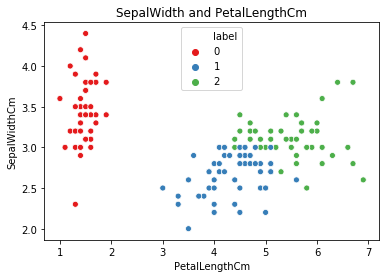

In [40]:
# Plot2
plt.title("SepalWidth and PetalLengthCm")
sns.scatterplot(x = 'PetalLengthCm', y = 'SepalWidthCm', hue = 'label', data = inp.kmean, palette = 'Set1')

Cluster 0 has high sepal width and low petal length .

Cluster 2 has High Petal length and average sepal width.

Cluster 1 has low Sepal width and average Petal length.


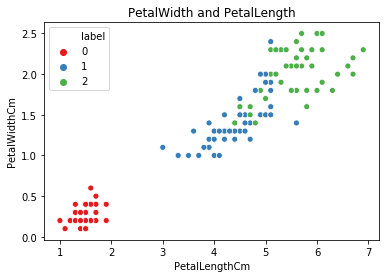

In [41]:
# Plot3
plt.title("PetalWidth and PetalLength")
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'label', data = inp.kmean, palette = 'Set1')

Cluster 0 has low petal width and low petal length .

Cluster 2 has High Petal length and high petal width.

Cluster 1 has average petal width and average Petal length.

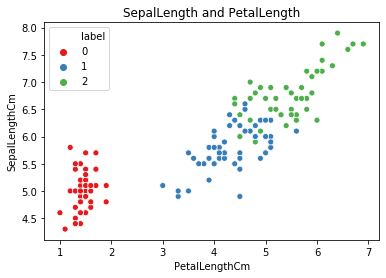

In [42]:
# Plot4
plt.title("SepalLength and PetalLength")
sns.scatterplot(x = 'PetalLengthCm', y = 'SepalLengthCm', hue = 'label', data = inp.kmean, palette = 'Set1')

Cluster 0 has low sepal length and low petal length .

Cluster 2 has High Petal length and high sepal length.

Cluster 1 has average Sepal length and average Petal length.


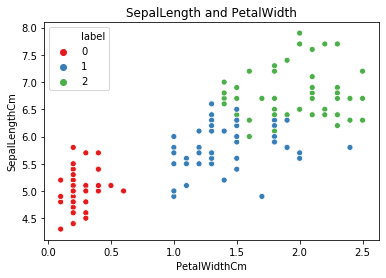

In [43]:
# Plot5
plt.title("SepalLength and PetalWidth")
sns.scatterplot(x = 'PetalWidthCm', y = 'SepalLengthCm', hue = 'label', data = inp.kmean, palette = 'Set1')

Cluster 0 has low sepal length and low petal width .

Cluster 2 has High Petal width and high sepal length.

Cluster 1 has average Sepal length and average Petal width.


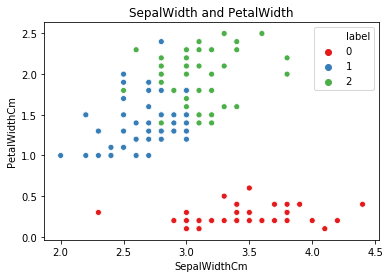

In [44]:
# Plot6
plt.title("SepalWidth and PetalWidth")
sns.scatterplot(x = 'SepalWidthCm', y = 'PetalWidthCm', hue = 'label', data = inp.kmean, palette = 'Set1')

Cluster 0 has average to high sepal width and low petal width .

Cluster 2 has High Petal width and average sepal width.

Cluster 1 has low to average Sepal width and average Petal width.


In [45]:
# Cluster Profiling
inp.kmean.drop('Species',axis = 1).groupby('label').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
label,,,,
0,5.006000,3.418000,1.464000,0.244000
1,5.801887,2.673585,4.369811,1.413208
2,6.780851,3.095745,5.510638,1.972340


<Figure size 1080x360 with 0 Axes>

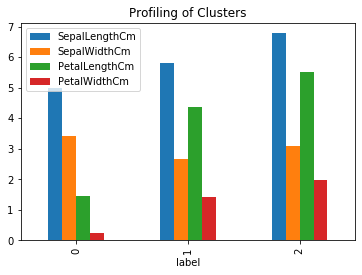

In [46]:
plt.figure(figsize=(15,5))
inp.kmean.drop('Species',axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.title("Profiling of Clusters")
plt.show()

## Cluster 0 has the highest Sepal Width and petal width and has the lowest Sepal length and petal length. 
## Cluster 2 has the highest Sepal length and petal length and lowest Sepal Width and petal width. 
## Cluster 1 has the lowest Sepal width and average values in other three categories.


In [64]:
## Grouping the dataset based on the clusters

In [65]:
#Cluster 0
inp.kmean[inp.kmean['label'] == 0]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


In [67]:
#Cluster 1

inp.kmean[inp.kmean['label'] == 1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
53,5.5,2.3,4.0,1.3,Iris-versicolor,1
54,6.5,2.8,4.6,1.5,Iris-versicolor,1
55,5.7,2.8,4.5,1.3,Iris-versicolor,1
57,4.9,2.4,3.3,1.0,Iris-versicolor,1
58,6.6,2.9,4.6,1.3,Iris-versicolor,1
59,5.2,2.7,3.9,1.4,Iris-versicolor,1
60,5.0,2.0,3.5,1.0,Iris-versicolor,1
61,5.9,3.0,4.2,1.5,Iris-versicolor,1
62,6.0,2.2,4.0,1.0,Iris-versicolor,1
63,6.1,2.9,4.7,1.4,Iris-versicolor,1


In [68]:
#Cluster 

inp.kmean[inp.kmean['label'] == 2]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
50,7.0,3.2,4.7,1.4,Iris-versicolor,2
51,6.4,3.2,4.5,1.5,Iris-versicolor,2
52,6.9,3.1,4.9,1.5,Iris-versicolor,2
56,6.3,3.3,4.7,1.6,Iris-versicolor,2
65,6.7,3.1,4.4,1.4,Iris-versicolor,2
70,5.9,3.2,4.8,1.8,Iris-versicolor,2
75,6.6,3.0,4.4,1.4,Iris-versicolor,2
76,6.8,2.8,4.8,1.4,Iris-versicolor,2
77,6.7,3.0,5.0,1.7,Iris-versicolor,2
85,6.0,3.4,4.5,1.6,Iris-versicolor,2


## By Kmeans Clustering method, i have segmented the dataset into 3 clusters using silhouette score and elbow curve graph. 